In [18]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [19]:
df = pd.read_csv('data/dow_jones_index.csv')
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [20]:
df.dropna(inplace=True)


In [21]:
df['date'].astype('datetime64[ns]')


1     2011-01-14
2     2011-01-21
3     2011-01-28
4     2011-02-04
5     2011-02-11
         ...    
745   2011-05-27
746   2011-06-03
747   2011-06-10
748   2011-06-17
749   2011-06-24
Name: date, Length: 720, dtype: datetime64[ns]

In [22]:
df['next_weeks_close'] = df['next_weeks_close'].str.replace('$', '')
df['next_weeks_open'] = df['next_weeks_open'].str.replace('$', '')
df['open'] = df['open'].str.replace('$', '')
df['close'] = df['close'].str.replace('$', '')
df['low'] = df['low'].str.replace('$', '')
df['high'] = df['high'].str.replace('$', '')






/var/folders/60/b59yh0f10dn10yn_3tns4q84r1cn7t/T/ipykernel_43584/2508559938.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['next_weeks_close'] = df['next_weeks_close'].str.replace('$', '')
/var/folders/60/b59yh0f10dn10yn_3tns4q84r1cn7t/T/ipykernel_43584/2508559938.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['next_weeks_open'] = df['next_weeks_open'].str.replace('$', '')
/var/folders/60/b59yh0f10dn10yn_3tns4q84r1cn7t/T/ipykernel_43584/2508559938.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['op

In [23]:
df['next_weeks_close'] = df['next_weeks_close'].astype(float)
df['next_weeks_open'] = df['next_weeks_open'].astype(float)
df['open'] = df['open'].astype(float)
df['close'] = df['close'].astype(float)
df['low'] = df['low'].astype(float)
df['high'] = df['high'].astype(float)

df['percent_change_price'] = df['percent_change_price'].astype(float)
df['percent_change_volume_over_last_wk	'] = df['percent_change_volume_over_last_wk'].astype(float)
df['previous_weeks_volume'] = df['previous_weeks_volume'].astype(float)




In [24]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,percent_change_volume_over_last_wk\t
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852,1.380223
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994,-43.024959
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989,9.355500
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029,1.987452
5,1,AA,2/11/2011,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712,-25.712195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855,3.004240,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801,-21.355713
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295,-2.521610,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960,15.221032
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844,-1.420980,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120,17.508519
748,2,XOM,6/17/2011,80.00,80.82,78.33,79.02,100521400,-1.225000,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786,8.811952


In [25]:
df.quarter.value_counts()


2    390
1    330
Name: quarter, dtype: int64

In [26]:
def missing_values_table(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table.sort_values('% of Total Values', ascending=False).round(1)
        print ("The selected dataframe have " + str(df.shape[1]) + " columns and " + str(df.shape[0])+" rows","\n\n")
        return mz_table

In [27]:
def remove_outlier(df,column):
  
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('Before Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() < 3]
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() > -3]
  
  plt.figure(figsize=(15,6))
  
  plt.subplot(1, 2, 1)
  plt.title('After Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])

/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mi

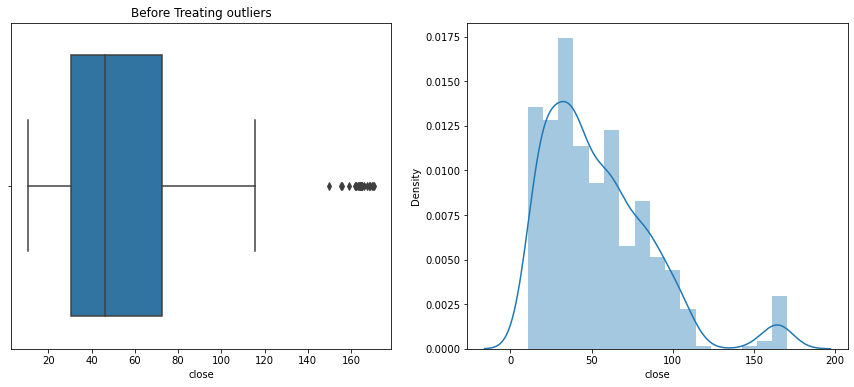

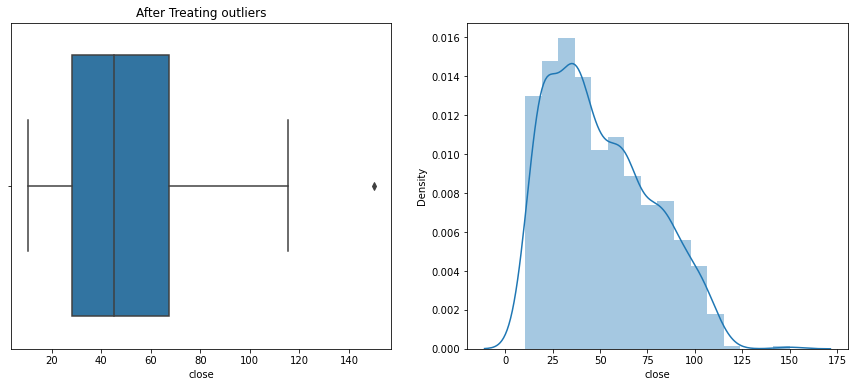

In [28]:
remove_outlier(df,'close')

/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mi

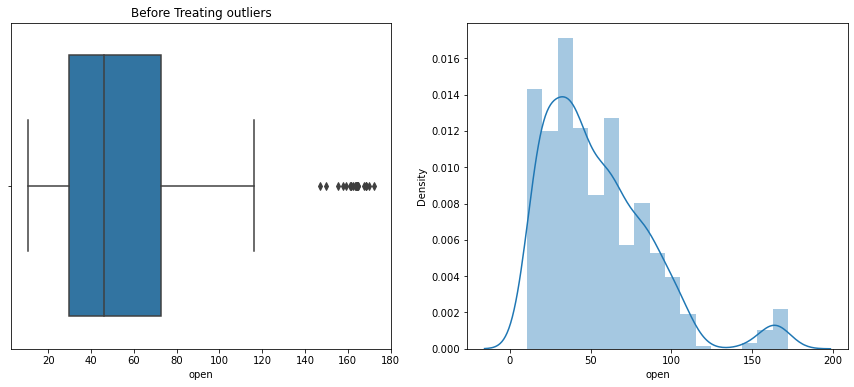

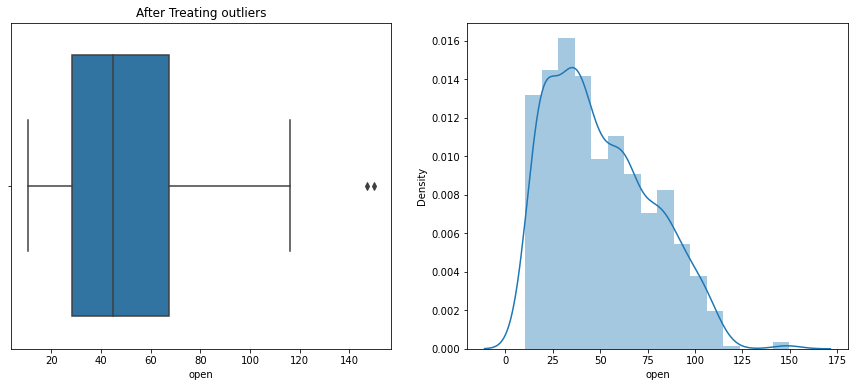

In [29]:
remove_outlier(df,'open')

/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mi

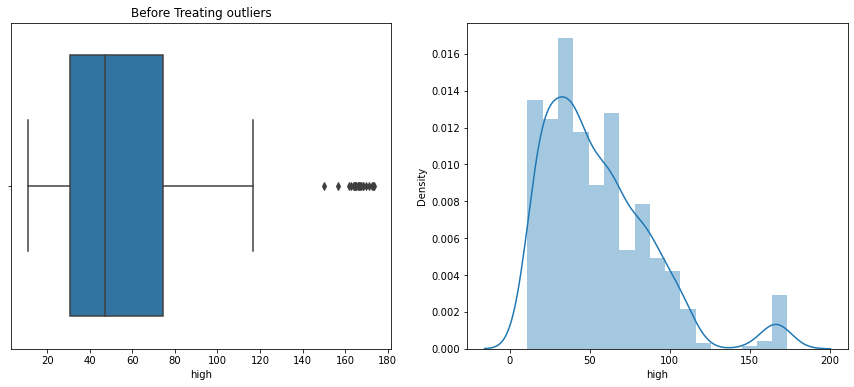

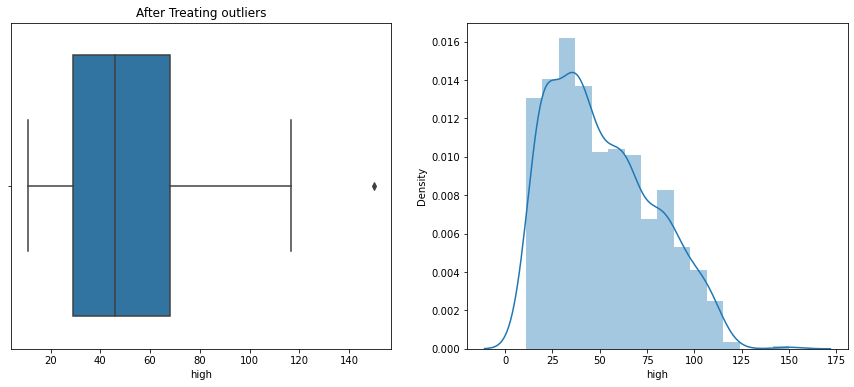

In [43]:
remove_outlier(df,'high')

/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mi

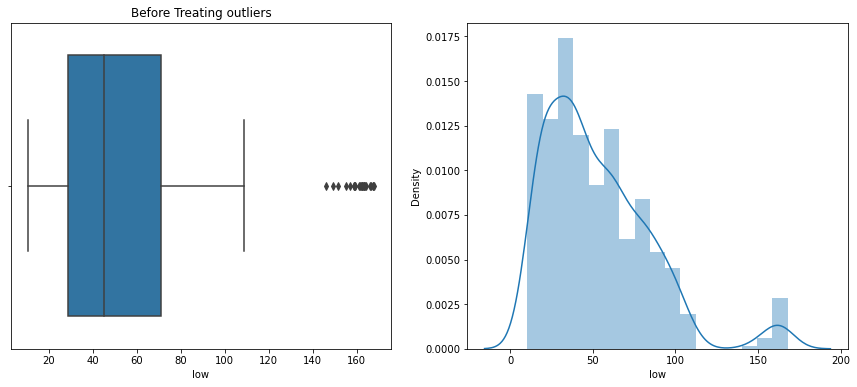

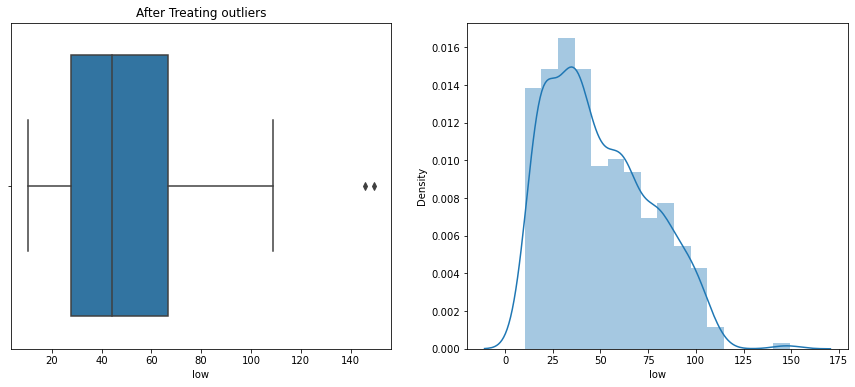

In [44]:
remove_outlier(df,'low')

In [54]:
import movecolumn as mc
import seaborn as sb

mc.MoveToLast(df,'close')






,quarter,stock,date,open,high,low,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,percent_change_volume_over_last_wk\t,open-close,low-high,target,close
1,31,AA,1/14/2011,16.71,16.71,15.64,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852,1.380223,0.74,-1.07,0,15.97
2,29,AA,1/21/2011,16.19,16.38,15.60,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994,-43.024959,0.40,-0.78,1,15.79
3,35,AA,1/28/2011,15.87,16.63,15.82,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989,9.355500,-0.26,-0.81,1,16.13
4,51,AA,2/4/2011,16.18,17.39,16.18,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029,1.987452,-0.96,-1.21,1,17.14
5,54,AA,2/11/2011,17.33,17.48,16.97,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712,-25.712195,-0.04,-0.51,0,17.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,561,XOM,5/27/2011,80.22,82.63,80.07,68230855,3.004240,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801,-21.355713,-2.41,-2.56,0,82.63
746,552,XOM,6/3/2011,83.28,83.75,80.18,78616295,-2.521610,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960,15.221032,2.10,-3.57,0,81.18
747,544,XOM,6/10/2011,80.93,81.87,79.72,92380844,-1.420980,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120,17.508519,1.15,-2.15,0,79.78
748,540,XOM,6/17/2011,80.00,80.82,78.33,100521400,-1.225000,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786,8.811952,0.98,-2.49,0,79.02


In [55]:
df['open-close']  = df['open'] - df['close']
df['low-high']  = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)


In [51]:
df


,quarter,stock,date,open,high,low,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,percent_change_volume_over_last_wk\t,close,open-close,low-high,target
1,31,AA,1/14/2011,16.71,16.71,15.64,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852,1.380223,15.97,0.74,-1.07,0
2,29,AA,1/21/2011,16.19,16.38,15.60,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994,-43.024959,15.79,0.40,-0.78,1
3,35,AA,1/28/2011,15.87,16.63,15.82,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989,9.355500,16.13,-0.26,-0.81,1
4,51,AA,2/4/2011,16.18,17.39,16.18,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029,1.987452,17.14,-0.96,-1.21,1
5,54,AA,2/11/2011,17.33,17.48,16.97,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712,-25.712195,17.37,-0.04,-0.51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,561,XOM,5/27/2011,80.22,82.63,80.07,68230855,3.004240,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801,-21.355713,82.63,-2.41,-2.56,0
746,552,XOM,6/3/2011,83.28,83.75,80.18,78616295,-2.521610,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960,15.221032,81.18,2.10,-3.57,0
747,544,XOM,6/10/2011,80.93,81.87,79.72,92380844,-1.420980,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120,17.508519,79.78,1.15,-2.15,0
748,540,XOM,6/17/2011,80.00,80.82,78.33,100521400,-1.225000,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786,8.811952,79.02,0.98,-2.49,0


In [138]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'stock'.
df['stock']= label_encoder.fit_transform(df['stock'])
  
df['stock'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17,
       16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

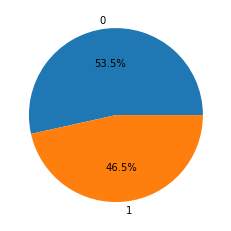

In [141]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()



/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


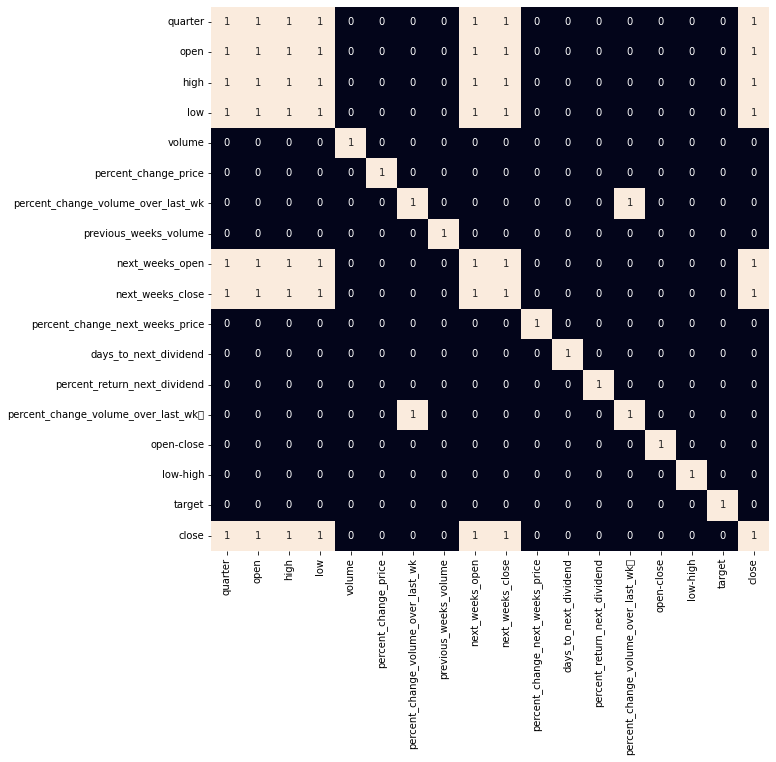

In [70]:
plt.figure(figsize=(10, 10))

sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [128]:
df1

,quarter,date,open,high,low,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,percent_change_volume_over_last_wk\t,open-close,low-high,target,close
1,31,1/14/2011,16.71,16.71,15.64,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852,1.380223,0.74,-1.07,0,15.97
2,29,1/21/2011,16.19,16.38,15.60,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994,-43.024959,0.40,-0.78,1,15.79
3,35,1/28/2011,15.87,16.63,15.82,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989,9.355500,-0.26,-0.81,1,16.13
4,51,2/4/2011,16.18,17.39,16.18,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029,1.987452,-0.96,-1.21,1,17.14
5,54,2/11/2011,17.33,17.48,16.97,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712,-25.712195,-0.04,-0.51,0,17.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,561,5/27/2011,80.22,82.63,80.07,68230855,3.004240,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801,-21.355713,-2.41,-2.56,0,82.63
746,552,6/3/2011,83.28,83.75,80.18,78616295,-2.521610,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960,15.221032,2.10,-3.57,0,81.18
747,544,6/10/2011,80.93,81.87,79.72,92380844,-1.420980,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120,17.508519,1.15,-2.15,0,79.78
748,540,6/17/2011,80.00,80.82,78.33,100521400,-1.225000,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786,8.811952,0.98,-2.49,0,79.02


In [142]:
X = np.array(df.index).reshape(-1,1)
Y = df['close']
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=101)

(648, 2) (72, 2)


In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve, roc_auc_score

In [144]:
ran = RandomForestClassifier(n_estimators=90)
knn = KNeighborsClassifier(n_neighbors=79)
lgr = LogisticRegression(solver='liblinear')


In [145]:
models = [LogisticRegression(),RandomForestClassifier(n_estimators=80),KNeighborsClassifier(n_neighbors=79)]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5256894507343941
Validation Accuracy :  0.6695515342250197

RandomForestClassifier(n_estimators=80) : 
Training Accuracy :  0.999985656364749
Validation Accuracy :  0.537765538945712

KNeighborsClassifier(n_neighbors=79) : 
Training Accuracy :  0.5268847536719706
Validation Accuracy :  0.6003147128245475



In [146]:
knn = KNeighborsClassifier(n_neighbors=79)
knn.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)

# f1 score
score = f1_score(y_pred, Y_test)

# print
print "Decision Tree F1 score: {:.2f}".format(score)



/Users/luzi/.local/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'XOM'

In [147]:
df.d

,quarter,stock,date,open,high,low,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,percent_change_volume_over_last_wk\t,open-close,low-high,target,close
1,31,0,1/14/2011,16.71,16.71,15.64,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852,1.380223,0.74,-1.07,0,15.97
2,29,0,1/21/2011,16.19,16.38,15.60,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994,-43.024959,0.40,-0.78,1,15.79
3,35,0,1/28/2011,15.87,16.63,15.82,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989,9.355500,-0.26,-0.81,1,16.13
4,51,0,2/4/2011,16.18,17.39,16.18,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029,1.987452,-0.96,-1.21,1,17.14
5,54,0,2/11/2011,17.33,17.48,16.97,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712,-25.712195,-0.04,-0.51,0,17.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,561,29,5/27/2011,80.22,82.63,80.07,68230855,3.004240,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801,-21.355713,-2.41,-2.56,0,82.63
746,552,29,6/3/2011,83.28,83.75,80.18,78616295,-2.521610,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960,15.221032,2.10,-3.57,0,81.18
747,544,29,6/10/2011,80.93,81.87,79.72,92380844,-1.420980,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120,17.508519,1.15,-2.15,0,79.78
748,540,29,6/17/2011,80.00,80.82,78.33,100521400,-1.225000,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786,8.811952,0.98,-2.49,0,79.02
